//  Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


// Loading data 

In [ ]:
data = pd.read_excel('../data/Online Retail.xlsx')  #fed data 
data = pd.DataFrame(data)     #feeding data to dataframe
data.head()


InvoiceNo StockCode  ... CustomerID         Country
0    536365    85123A  ...    17850.0  United Kingdom
1    536365     71053  ...    17850.0  United Kingdom
2    536365    84406B  ...    17850.0  United Kingdom
3    536365    84029G  ...    17850.0  United Kingdom
4    536365    84029E  ...    17850.0  United Kingdom

[5 rows x 8 columns]

**Data** **Visualisation**

// Plot of No. of transactions made vs country

// Plotting top 5 countries where higher number of transactions made



Text(0.5, 1.0, 'Countries vs Count')

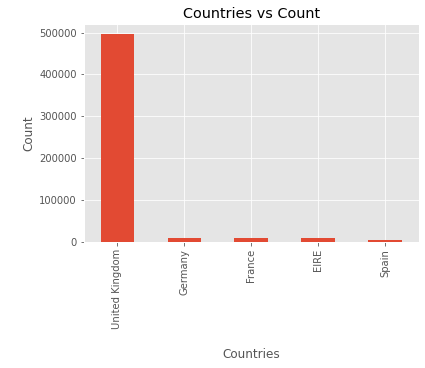

In [ ]:
#plotting
data['Country'].value_counts()[:5].plot(kind='bar')   #finding the count of top 5 countries 
plt.xlabel('\nCountries')
plt.ylabel('\nCount')
plt.style.use('ggplot')
plt.title("Countries vs Count")

// Plotting Top 10 leaving the 1st because of its higher number compared to others just to make the graph look better

Text(0.5, 1.0, 'Countries vs Count')

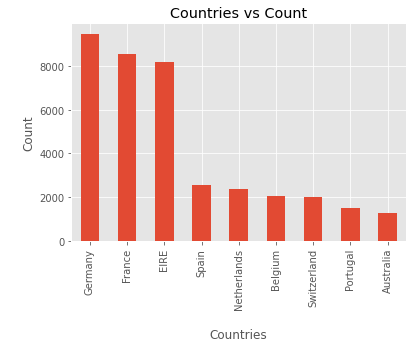

In [ ]:
#plotting
data['Country'].value_counts()[1:10].plot(kind='bar')  #find the top 10 after 1st countries
plt.xlabel('\nCountries')
plt.ylabel('\nCount')
plt.style.use('ggplot')
plt.title("Countries vs Count")



// Plot of items vs no. of times it bought

// Plotting top 10 items which were bought by most people

Text(0.5, 1.0, 'Items vs Count')

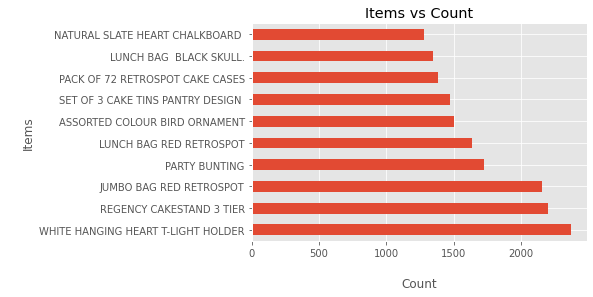

In [ ]:
data['Description'].value_counts()[:10].plot(kind='barh')
plt.xlabel('\nCount')
plt.ylabel('\nItems')
plt.style.use('ggplot')
plt.title("Items vs Count")

**Data Preprocessing**

// Removing redundant columns or columns which are not useful for finding interesting sequences

// Sorting the items in each transaction using time and invoice so that sequence of items bought are fed into description


//handling missing values

In [ ]:
data1 = data.drop(['StockCode','Quantity','InvoiceDate','UnitPrice','CustomerID','Country'],axis=1) #dropping unnecessary columns
data1.dropna()  #handling missing values
data1 = data1.groupby('InvoiceNo').agg(lambda x: list(x))  #sorting by time and transaction Id ie Invoice

// Displaying data after preprocessing

// SID or TID is InvoiceNo and Description is sequence of transactions made

In [ ]:
data1.head()


Description
InvoiceNo                                                   
536365     [WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...
536366     [HAND WARMER UNION JACK, HAND WARMER RED POLKA...
536367     [ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO...
536368     [JAM MAKING SET WITH JARS, RED COAT RACK PARIS...
536369                            [BATH BUILDING BLOCK WORD]

// GSP Algorithm Implementation

In [ ]:
from collections import Counter

#function to calculate frequency of each itemset

def calc_freq(data, item):
    counter = 0
    checker = True
    
    for a in data:
        c = Counter(a)
        for b in range(0,len(item)):
            if c[item[b]] != 1:
                checker = False
        if checker == True:
            counter = counter+1
        checker = True
    result = counter
    return result

#function to find candidate_1 (1-item sequences)

def C_1(data, C1):
  for transaction in data:
    for item in transaction:
      if not [item] in C1:
        if str(item) != 'nan':
          C1.append([item])
  return C1


#function to find pruned candidate_1 ie L_1

def C_k(data,candidate_1,candidate_k,freq_items,minsup):
  minsup = minsup*len(data)
  for i in candidate_1:
      freq = calc_freq(data, i)
      if freq >= minsup:
          freq_items.append(list(i))
          freq_items.append(freq)
          candidate_k.append(list(i))
  return candidate_k,freq_items

#pruning_further until no more freq items found

def pruning(data,candidate_k,freq_items,minsup):

  while len(candidate_k)!= 0:   
      candidate_nonpruned = []

      for i in range(0,len(candidate_k)):
          for j in range(i+1,len(candidate_k)):
              if candidate_k[i][1:len(candidate_k[i])] == candidate_k[j][0:len(candidate_k[j])-1]:
                  list_temp2 = []
                  for k in candidate_k[i]:
                      list_temp2.append(k)
                  list_temp2.append(candidate_k[j][len(candidate_k[j])-1])
                  candidate_nonpruned.append(list_temp2)
      candidate_temp = []
      for i in candidate_nonpruned:
          if calc_freq(data, i) >= minsup:      #checking for support meeting minsup
              candidate_temp.append(i)
      candidate_pruned = []
      
      for i in candidate_temp:
          subsets = []
          for j in i:
              i_temp = []
              for k in i:
                  i_temp.append(k)
              i_temp.remove(j)
              subsets.append(i_temp)
          checker2 = True
          for k in subsets:
              if k not in candidate_k:
                  checker2 = False
          if checker2 == True:
              candidate_pruned.append(i)
      if len(candidate_pruned) != 0:
          for c in candidate_pruned:
              freq_items.append(c)
              freq = calc_freq(data, c)
              freq_items.append(freq)
      candidate_k = candidate_pruned             #finding k-candidates
      return freq_items

 
#function to implement GSP on a data
def finding_patterns(data,minsup):
    C1 = []
    candidate_1 = C_1(data,C1)
    print("Unique items: \n", candidate_1,"\n")
    candidate_k = []
    freq_items = []
    candidate_k,freq_items = C_k(data,candidate_1,candidate_k,freq_items,minsup)
    freq_items = pruning(data,candidate_k,freq_items,minsup)
    return freq_items


**Results**

// Printing frequent or interesting sequences

// to get sequences of size 2 and >2 the support was given smaller which made no. of sequences higher and making the total no. of sequences very high

// so printing only 60k which includes of all lengths

// also sequences are downloaded as file and will be shared for support = 0.01 which has higher runtime which gave upto 4-length sequences





**Overall** **data** **Sequences**

In [ ]:
minsup = 0.015   #support to find sequences
freq_items = finding_patterns(data1['Description'],minsup)  #frequent sequences
print("Unique Items: \n",uni,"\n")
print("Frequent Sequences: \n",freq_items)

Unique Items: 
 [['WHITE HANGING HEART T-LIGHT HOLDER'], ['WHITE METAL LANTERN'], ['CREAM CUPID HEARTS COAT HANGER'], ['KNITTED UNION FLAG HOT WATER BOTTLE'], ['RED WOOLLY HOTTIE WHITE HEART.'], ['SET 7 BABUSHKA NESTING BOXES'], ['GLASS STAR FROSTED T-LIGHT HOLDER'], ['HAND WARMER UNION JACK'], ['HAND WARMER RED POLKA DOT'], ['ASSORTED COLOUR BIRD ORNAMENT'], ["POPPY'S PLAYHOUSE BEDROOM "], ["POPPY'S PLAYHOUSE KITCHEN"], ['FELTCRAFT PRINCESS CHARLOTTE DOLL'], ['IVORY KNITTED MUG COSY '], ['BOX OF 6 ASSORTED COLOUR TEASPOONS'], ['BOX OF VINTAGE JIGSAW BLOCKS '], ['BOX OF VINTAGE ALPHABET BLOCKS'], ['HOME BUILDING BLOCK WORD'], ['LOVE BUILDING BLOCK WORD'], ['RECIPE BOX WITH METAL HEART'], ['DOORMAT NEW ENGLAND'], ['JAM MAKING SET WITH JARS'], ['RED COAT RACK PARIS FASHION'], ['YELLOW COAT RACK PARIS FASHION'], ['BLUE COAT RACK PARIS FASHION'], ['BATH BUILDING BLOCK WORD'], ['ALARM CLOCK BAKELIKE PINK'], ['ALARM CLOCK BAKELIKE RED '], ['ALARM CLOCK BAKELIKE GREEN'], ['PANDA AND BUNNIES S

// Finding patterns **Country** **wise** since it will give us more descriptive analysis

// Grouping data country wise and finding unique countries

In [ ]:
countries = []
countries = list(data['Country'].unique())  #finding Unique Countries
print("Total Countries: ",len(countries))    
country_b = []
for country in countries:
    country_b.append(data[data["Country"]==country])   #dividing data based on country

Total Countries:  38


// Function to find sequences for a given country

In [ ]:
def Sequences_of_Countries(country):
  i = countries.index(country)
  x = pd.DataFrame(country_b[i])    #making dataframe for a particular country
  x = x.drop(['StockCode','Quantity','InvoiceDate','UnitPrice','CustomerID','Country'],axis=1) #dropping unnecessary columns
  x.dropna()  #handling missing values
  x = x.groupby(['InvoiceNo']).agg(lambda x: list(x))  #grouping and sorting to make sequences
  freq_items = finding_patterns(x['Description'],0.015)   #finding frequent sequences
  print("Frequent Sequences: \n",freq_items)

**Results for country wise**

**France :**

In [ ]:
Sequences_of_Countries("France")

Unique items: 
 [['ALARM CLOCK BAKELIKE PINK'], ['ALARM CLOCK BAKELIKE RED '], ['ALARM CLOCK BAKELIKE GREEN'], ['PANDA AND BUNNIES STICKER SHEET'], ['STARS GIFT TAPE '], ['INFLATABLE POLITICAL GLOBE '], ['VINTAGE HEADS AND TAILS CARD GAME '], ['SET/2 RED RETROSPOT TEA TOWELS '], ['ROUND SNACK BOXES SET OF4 WOODLAND '], ['SPACEBOY LUNCH BOX '], ['LUNCH BOX I LOVE LONDON'], ['CIRCUS PARADE LUNCH BOX '], ['CHARLOTTE BAG DOLLY GIRL DESIGN'], ['RED TOADSTOOL LED NIGHT LIGHT'], [' SET 2 TEA TOWELS I LOVE LONDON '], ['VINTAGE SEASIDE JIGSAW PUZZLES'], ['MINI JIGSAW CIRCUS PARADE '], ['MINI JIGSAW SPACEBOY'], ['MINI PAINT SET VINTAGE '], ['POSTAGE'], ['PICTURE DOMINOES'], ['MINI JIGSAW DOLLY GIRL'], ['POLKADOT RAIN HAT '], ['EDWARDIAN PARASOL BLACK'], ['EDWARDIAN PARASOL PINK'], ['EDWARDIAN PARASOL RED'], ['RED  HARMONICA IN BOX '], ['LUNCH BOX WITH CUTLERY RETROSPOT '], ['SET OF SALT AND PEPPER TOADSTOOLS'], ['TEA PARTY BIRTHDAY CARD'], ['ASSORTED COLOUR MINI CASES'], ['RED RETROSPOT MINI CAS

**Spain :**

In [ ]:
Sequences_of_Countries("Spain")

Unique items: 
 [['LUNCH BAG SUKI  DESIGN '], ['LUNCH BAG PINK POLKADOT'], ['LUNCH BAG  BLACK SKULL.'], ['LUNCH BAG RED RETROSPOT'], ['LUNCH BAG CARS BLUE'], ['CABIN BAG VINTAGE RETROSPOT'], ['FOUR HOOK  WHITE LOVEBIRDS'], ['BIRTHDAY PARTY CORDON BARRIER TAPE'], ['DANISH ROSE PHOTO FRAME'], ['LAVENDER SCENTED FABRIC HEART'], ['BOX OF 24 COCKTAIL PARASOLS'], ['PHOTO FRAME 3 CLASSIC HANGING'], ['WHITE BAMBOO RIBS LAMPSHADE'], ['CERAMIC STRAWBERRY CAKE MONEY BANK'], ['STARS GIFT TAPE '], ['HEARTS GIFT TAPE'], ['EMERGENCY FIRST AID TIN '], ['PARTY BUNTING'], ['WHITE HANGING HEART T-LIGHT HOLDER'], ['SET/3 RED GINGHAM ROSE STORAGE BOX'], ['BLUE COAT RACK PARIS FASHION'], ['RED COAT RACK PARIS FASHION'], ['YELLOW COAT RACK PARIS FASHION'], ['CIRCUS PARADE LUNCH BOX '], ['SET OF 2 TINS VINTAGE BATHROOM '], ['SET OF 20 VINTAGE CHRISTMAS NAPKINS'], ['LOVE HEART NAPKIN BOX '], ['ALARM CLOCK BAKELIKE GREEN'], ['GLITTER BUTTERFLY CLIPS'], ['GLITTER HANGING BUTTERFLY STRING'], ['CUPID DESIGN SCENTE

**Belgium :**

In [ ]:
Sequences_of_Countries("Belgium")

Unique items: 
 [['SET OF 20 KIDS COOKIE CUTTERS'], ['RED RETROSPOT ROUND CAKE TINS'], ['PACK OF 72 RETROSPOT CAKE CASES'], ['PACK OF 60 PINK PAISLEY CAKE CASES'], ['PACK OF 60 SPACEBOY CAKE CASES'], ['PACK OF 60 DINOSAUR CAKE CASES'], ['PACK OF 60 MUSHROOM CAKE CASES'], ['PLASTERS IN TIN SPACEBOY'], ['JUMBO BAG RED RETROSPOT'], ['CHARLOTTE BAG SUKI DESIGN'], ['72 SWEETHEART FAIRY CAKE CASES'], ['POSTAGE'], ['ANTIQUE GLASS PEDESTAL BOWL'], ['VINTAGE CREAM CAT FOOD CONTAINER'], ['LARGE CAKE STAND HANGING HEARTS'], ['REGENCY CAKESTAND 3 TIER'], ['SET OF 6 SOLDIER SKITTLES'], ['VICTORIAN  METAL POSTCARD SPRING'], ['EASTER TIN BUCKET'], ['SILK PURSE BABUSHKA RED'], ['MIRROR CORNICE'], ['RECIPE BOX PANTRY YELLOW DESIGN'], ['DOLLY GIRL LUNCH BOX'], ['RED RETROSPOT TAPE'], ['HEARTS GIFT TAPE'], ['PAPERWEIGHT CHILDHOOD MEMORIES'], ['CABIN BAG VINTAGE RETROSPOT'], ['POLKADOT PEN'], ['SMALL RED BABUSHKA NOTEBOOK '], ['SMALL PURPLE BABUSHKA NOTEBOOK '], ['RECIPE BOX RETROSPOT '], ["PINK B'FLY C/C

**Australia :**

In [ ]:
Sequences_of_Countries("Australia")

Unique items: 
 [['CHRISTMAS LIGHTS 10 REINDEER'], ['VINTAGE UNION JACK CUSHION COVER'], ['VINTAGE HEADS AND TAILS CARD GAME '], ['SET OF 3 COLOURED  FLYING DUCKS'], ['SET OF 3 GOLD FLYING DUCKS'], ['RED RETROSPOT UMBRELLA'], ['BLACK/BLUE POLKADOT UMBRELLA'], ['RED DINER WALL CLOCK'], ['ALARM CLOCK BAKELIKE GREEN'], ['ALARM CLOCK BAKELIKE RED '], ['BLUE DINER WALL CLOCK'], ['IVORY DINER WALL CLOCK'], ['LARGE HEART MEASURING SPOONS'], ['SMALL HEART MEASURING SPOONS'], ['20 DOLLY PEGS RETROSPOT'], ['ASSORTED BOTTLE TOP  MAGNETS '], ['IVORY GIANT GARDEN THERMOMETER'], ['BIRTHDAY PARTY CORDON BARRIER TAPE'], ['PHARMACIE FIRST AID TIN'], ['SET OF 2 ROUND TINS CAMEMBERT '], ['PLASTERS IN TIN STRONGMAN'], ['PLASTERS IN TIN VINTAGE PAISLEY '], ['DOORMAT UNION FLAG'], ['CORONA MEXICAN TRAY'], ['LUNCH BAG RED RETROSPOT'], ['JUMBO BAG RED RETROSPOT'], ['ALARM CLOCK BAKELIKE PINK'], ['LOVEBIRD HANGING DECORATION WHITE '], ['DOORMAT RED RETROSPOT'], ['RIBBON REEL LACE DESIGN '], ['RIBBON REEL HEART

**Netherlands :**

In [ ]:
Sequences_of_Countries("Netherlands")

Unique items: 
 [['HAND WARMER BIRD DESIGN'], ['POSTAGE'], ['PACK OF 12 WOODLAND TISSUES '], ['PACK OF 12 PINK POLKADOT TISSUES'], ['SET OF 3 CAKE TINS PANTRY DESIGN '], ['JUMBO STORAGE BAG SUKI'], ['PACK OF 20 SPACEBOY NAPKINS'], ['FUNKY WASHING UP GLOVES ASSORTED'], ['RED RETROSPOT BIG BOWL'], ['JAM MAKING SET WITH JARS'], ['CHARLOTTE BAG SUKI DESIGN'], ['SET/10 IVORY POLKADOT PARTY CANDLES'], ['PINK PARTY BAGS'], ['WOODLAND PARTY BAG + STICKER SET'], ['RETROSPOT PARTY BAG + STICKER SET'], ['200 RED + WHITE BENDY STRAWS'], ['PENCIL CASE LIFE IS BEAUTIFUL'], ['PACK OF 72 RETROSPOT CAKE CASES'], ['EASTER TIN KEEPSAKE'], ['PINK METAL CHICKEN HEART '], ['YELLOW METAL CHICKEN HEART '], ['EASTER TIN BUNNY BOUQUET'], ['ASSORTED EASTER DECORATIONS  BELLS'], ['SUKI  SHOULDER BAG'], ['LUNCH BAG SUKI  DESIGN '], ['PACK OF 72 SKULL CAKE CASES'], ['SKULL LUNCH BOX WITH CUTLERY '], ['JUMBO STORAGE BAG SKULLS'], ['PACK OF 60 SPACEBOY CAKE CASES'], ['SPACEBOY TV DINNER TRAY'], ['TV DINNER TRAY DOLLY